In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
# *****************************************
#              Extract phase              
# *****************************************

fileDir="./data/"

In [3]:
with open(f"{fileDir}wikipedia.movies.json", mode="r") as file:
    # Store the json content as a list
    wikiMoviesRaw = json.load(file)

# Check loaded records
len(wikiMoviesRaw)

7311

In [4]:
# Check first 5 records
wikiMoviesRaw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [5]:
# Check last 5 records
wikiMoviesRaw[:-5]

$190,000'},
 {'url': 'https://en.wikipedia.org/wiki/Disclosure_(film)',
  'year': 1994,
  'imdb_link': 'https://www.imdb.com/title/tt0109635/',
  'title': 'Disclosure',
  'Directed by': 'Barry Levinson',
  'Produced by': ['Michael Crichton', 'Barry Levinson'],
  'Written by': 'Paul Attanasio',
  'Based on': ['Disclosure', 'by Michael Crichton'],
  'Starring': ['Michael Douglas',
   'Demi Moore',
   'Donald Sutherland',
   'Caroline Goodall',
   'Dennis Miller'],
  'Music by': 'Ennio Morricone',
  'Cinematography': 'Tony Pierce-Roberts',
  'Edited by': 'Stu Linder',
  'Distributed by': 'Warner Bros.',
  'Release date': ['December 9, 1994', '(', '1994-12-09', ')'],
  'Running time': '128 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$55 million',
  'Box office': '$214 million'},
 {'url': 'https://en.wikipedia.org/wiki/Don%27t_Drink_the_Water_(1994_film)',
  'year': 1994,
  'imdb_link': 'https://www.imdb.com/title/tt0109644/',
  'title': "Don't Drink the Wa

In [6]:
# Check records in the middle
wikiMoviesRaw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [7]:
# Kaggle data

kaggleMetadata = pd.read_csv(f"{fileDir}movies_metadata.csv", low_memory=False)
ratings = pd.read_csv(f"{fileDir}ratings.csv")

In [8]:
kaggleMetadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
kaggleMetadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [11]:
# sample function will sample random rows
kaggleMetadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
40149,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.netflix.com/WiMovie/80029368,336736,tt4624852,en,Chris D'Elia: Incorrigible,A Netflix Comedy Special: Comedian and actor ...,...,2015-04-17,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,With his one-of-a-kind take on everything from...,Chris D'Elia: Incorrigible,False,4.9,8.0
11449,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,40574,tt0014945,en,Girl Shy,"Harold Meadows (Lloyd) is a shy, stuttering ba...",...,1924-04-20,0.0,80.0,[],Released,NaN,Girl Shy,False,6.9,14.0
1741,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,6264,tt0119947,en,Prince Valiant,"An Arthurian legend of young Prince Valiant, s...",...,1997-07-24,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"He who holds the sword, rules the world.",Prince Valiant,False,4.7,10.0
15009,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,15382,tt0044518,fr,Crin blanc: Le cheval sauvage,"In the south of France, in a vast plain region...",...,1953-12-19,0.0,47.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,White Mane,False,6.4,16.0
15881,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 27,...",NaN,32021,tt0069002,en,The Night Strangler,"After being run out of Las Vegas, Kolchak head...",...,1973-01-16,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Night Strangler,False,6.5,11.0


In [12]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
693314,7062,919,5.0,1004673987
181555,1888,32,4.0,1058172629
15513138,161443,2001,3.5,1140325517
1003774,10223,216,3.0,1012634151
16429100,170772,236,2.0,945146046


In [13]:
# *****************************************
#           Transform phase              
# *****************************************

wikiMoviesDF = pd.DataFrame(wikiMoviesRaw)

In [14]:
# Check first 5 rows
wikiMoviesDF.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Having 193 columns they will not be printed if only executing wikiMoviesDF.columns, it is needed to convert it to a list
wikiMoviesDF.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [16]:
# List comprehension to filter the data
wikiMovies = [movie for movie in wikiMoviesRaw 
    if("Director" in movie or "Directed by" in movie) 
        and "imdb_link" in movie]
len(wikiMovies)

7080

In [17]:
wikiMoviesDF = pd.DataFrame(wikiMovies)
# Check current number of columns
print(len(wikiMoviesDF.columns.to_list()))
# Print columns
wikiMoviesDF.columns.to_list()

78


['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Camera setup'

In [18]:
# The column "No. of episodes" indicates TV shows are inclueded. We clear them out

# List comprehension to filter the data
wikiMovies = [movie for movie in wikiMoviesRaw 
    if ("Director" in movie or "Directed by" in movie) 
        and "imdb_link" in movie
        and 'No. of episodes' not in movie]
len(wikiMovies)

7076

In [19]:
# Clean bad data from each movie (alternative titles)
# -----------------------------------------------------
# Arabic movies
wikiMoviesDF[wikiMoviesDF["Arabic"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [20]:
# We check urls to fully understand the meaning of that column
wikiMoviesDF[wikiMoviesDF["Arabic"].notnull()]["url"]

6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [21]:
# Find out which, like Arabic, are Alternate names
sorted(wikiMoviesDF.columns.tolist())
wikiMoviesDF[wikiMoviesDF["Cantonese"].notnull()]["url"]

6460    https://en.wikipedia.org/wiki/Ip_Man_3
Name: url, dtype: object

In [22]:
for col in wikiMoviesDF.columns.to_list():
    counter = wikiMoviesDF[wikiMoviesDF[col].notnull()].count()[col]
    if counter <=100:
        print(f"{col} -----> {counter}")
    # len(wikiMoviesDF[col])

Theme music composer -----> 69
Executive producer(s) -----> 100
Production location(s) -----> 50
Picture format -----> 68
Audio format -----> 64
Voices of -----> 2
Followed by -----> 9
Composer(s) -----> 9
Created by -----> 11
Also known as -----> 2
Opening theme -----> 1
No. of episodes -----> 4
Preceded by -----> 10
Adaptation by -----> 2
Suggested by -----> 1
Traditional -----> 5
Mandarin -----> 4
Released -----> 2
Recorded -----> 2
Venue -----> 1
Length -----> 2
Label -----> 2
Director -----> 2
Producer -----> 2
Animation by -----> 2
Color process -----> 1
Simplified -----> 4
French -----> 1
Camera setup -----> 1
Screen story by -----> 1
Hangul -----> 2
Revised Romanization -----> 2
McCune–Reischauer -----> 2
Original title -----> 1
Japanese -----> 4
Hepburn -----> 4
Literally -----> 3
Cantonese -----> 1
Chinese -----> 1
Yiddish -----> 1
Arabic -----> 2
Romanized -----> 2
Russian -----> 1
Hebrew -----> 1
Polish -----> 1


In [23]:
# Function to clean bad data from each movie
def cleanMovie(movie):
    movie = dict(movie) # create a non-destructive copy
    altTitles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            altTitles[key]=movie[key]
            movie.pop(key)
    
    if len(altTitles) > 0:
        movie["alt_titles"] = altTitles

    return movie


In [24]:
# Create a list applying the previous function
cleanMovies = [cleanMovie(movie) for movie in wikiMovies]

In [25]:
# Check result dictionary
cleanMovies[:3]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [26]:
# Create dataframe with cleaned data
wikiMoviesDF = pd.DataFrame(cleanMovies)
# Print the number of columns
print(len(wikiMoviesDF.columns.to_list()))
# Print column names
sorted(wikiMoviesDF.columns.to_list())

56


['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [27]:
# Redefine the function clean data to add a inner function that renames column names

# Function to clean bad data from each movie
def cleanMovie(movie):
    movie = dict(movie) # create a non-destructive copy
    altTitles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            altTitles[key]=movie[key]
            movie.pop(key)
    
    if len(altTitles) > 0:
        movie["alt_titles"] = altTitles
    
    # Function to change the name of a column
    def changeColumnName(oldName, newName):
        if oldName in movie:
            movie[newName] = movie.pop(oldName)

    # Change the name columns with different name but same data content  
    changeColumnName('Adaptation by', 'Writer(s)')
    changeColumnName('Country of origin', 'Country')          
    changeColumnName("Directed by", "Director")
    changeColumnName("Distributed by", "Distributor")
    changeColumnName("Edited by", "Editor(s)")
    changeColumnName('Length', 'Running time')
    changeColumnName('Original release', 'Release date')
    changeColumnName('Music by', 'Composer(s)')
    changeColumnName("Produced by", "Producer(s)")
    changeColumnName("Producer", "Producer(s)")
    changeColumnName('Productioncompanies ', 'Production company(s)')
    changeColumnName('Productioncompany ', 'Production company(s)')
    changeColumnName("Released", "Release date")
    changeColumnName('Screen story by', 'Writer(s)')
    changeColumnName('Screenplay by', 'Writer(s)')
    changeColumnName('Story by', 'Writer(s)')
    changeColumnName('Theme music composer', 'Composer(s)')
    changeColumnName('Written by', 'Writer(s)')

    return movie

In [28]:
# Recreate the cleanMovies list with the modified function
cleanMovies = [cleanMovie(movie) for movie in wikiMovies]

In [29]:
# Check result dictionary
cleanMovies[:3]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Cinematography': 'Oliver Wood',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',
  'Box office': '$21.4 million',
  'Director': 'Renny Harlin',
  'Distributor': '20th Century Fox',
  'Editor(s)': 'Michael Tronick',
  'Composer(s)': ['Cliff Eidelman', 'Yello'],
  'Producer(s)': ['Steve Perry', 'Joel Silver'],
  'Production company(s)': 'Silver Pictures',
  'Writer(s)': ['David Arnott', 'James Cappe']},
 {'url': 'https://en.wikipedia.org

In [30]:
# Create dataframe with cleaned data
wikiMoviesDF = pd.DataFrame(cleanMovies)
# Print the number of columns after the reduction
print(len(wikiMoviesDF.columns.to_list()))
# Print column names
sorted(wikiMoviesDF.columns.to_list())

39


['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [31]:
wikiMoviesDF["imdb_id"] = wikiMoviesDF["imdb_link"].str.extract(r"(tt\d{7})")
# Print wikiMoviesDF size before duplicates drop
print(f"Before duplicates drop: {len(wikiMoviesDF)} rows")
wikiMoviesDF.drop_duplicates(subset="imdb_id", inplace=True)
# Print wikiMoviesDF size after duplicates drop
print(f"After duplicates drop: {len(wikiMoviesDF)} rows")
wikiMoviesDF.head()


Before duplicates drop: 7076 rows
After duplicates drop: 7033 rows


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [32]:
# Clean mostly null columns
# --------------------------------
# Check number of null values per column
[[column,wikiMoviesDF[column].isnull().sum()] for column in wikiMoviesDF.columns ]


[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [33]:
# Get columns with non-null values > 90%
wikiColumnsToKeep = [column for column in wikiMoviesDF.columns if wikiMoviesDF[column].isnull().sum() < len(wikiMoviesDF) * 0.9]
# Redefine the Dataframe to only keep the wanted columns 
wikiMoviesDF = wikiMoviesDF[wikiColumnsToKeep]

In [34]:
# Convert and parse data
# ---------------------------
# Check datatypes
wikiMoviesDF.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [35]:
# BoxOffice, Budget and Running time should be numerical, Release Date a date object

# Convert Box office to numerical type
boxOffice = wikiMoviesDF["Box office"].dropna()
# Print number of Box Office not null values
print(len(boxOffice))
boxOffice.sample(n=10)

5485


3273       $6.4 million
659         $18 million
6266       $5.4 million
3620         $1,522,377
1103         $3,337,685
509        $128 million
5608     $694.4 million
1325      $66.4 million
4736      $41.3 million
177     [$3,331, (USA)]
Name: Box office, dtype: object

In [36]:
# To use a regex we need the data to be string so let us build a function
def isNotString(x):
    return type(x) != str

# Apply the function to Box Office
boxOffice[boxOffice.map(isNotString)] 

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [37]:
# Use Lambda functions to substitute previous cell
boxOffice[boxOffice.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [38]:
# For the elements that are lists let us join them in a single string
boxOffice = boxOffice.apply(lambda x: " ".join(x) if type(x) == list else x)
boxOffice

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [39]:
# Regular expresions:
# ----------------------------
# Regex for the $123.4 million/billion entries. r avoids the escape bar to really escapes in python
# considering the string literally  
formOne = r"\$\d+\.?\d*\s*[m|b]illion"

# Check how many rows match the formOne regex
boxOffice.str.contains(formOne,flags = re.IGNORECASE).sum()

3896

In [40]:
# Regex for the $1,234,567 entries
formTwo = r"\$\d{1,3}(?:,\d{3})+"
# Check how many rows match the formTwo regex
boxOffice.str.contains(formTwo,flags = re.IGNORECASE).sum()

1544

In [41]:
# Check which values do not match any of the regex
matchesFromOne = boxOffice.str.contains(formOne,flags = re.IGNORECASE)
matchesFromTwo = boxOffice.str.contains(formTwo,flags = re.IGNORECASE)

# /!\ Following sintax thows an error
# boxOffice[(not matchesFromOne) and (not matchesFromTwo)]

# The following is needed
boxOffice[~matchesFromOne & ~matchesFromTwo]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [42]:
# Include in the patterns values with a space between $ and number,
#       accept . instead of , for thousands separator (use of character set [,\.] to accept any),
#       discard 1.234 million/billion (use negative lookahead group),
#       misspelling word million as millon (make optional the second i)
formOne = r"\$\s*\d+\.?\d*\s*[mb]illi?on"
formTwo = r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)"


In [43]:
# Handle ranges: we will just keep the second number of the range
boxOffice = boxOffice.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)


In [44]:
# Combine both regex to match either one.
# Extract function gets data that match a given regex into a DataFrame
boxOffice.str.extract(f"({formOne}|{formTwo})")


,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [45]:
# Function to convert values into numberic format
def parseDollars(s):

    # if s is not a string, return NaN
    if type(s) != str:
        return np

    # if input is of the form $###.# million
    if re.match(r"\$\s*\d+\.?\d*\s*milli?on", s, flags=re.IGNORECASE):
        
        # remove dollar sign and " million"
        s = re.sub("\$|\s|[a-zA-Z]", "", s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        return value
        
    # if input is of the form $###.# billion
    elif re.match(r"\$\s*\d+\.?\d*\s*billi?on", s, flags=re.IGNORECASE):
        
        # remove dollar sign and " billion"
        s = re.sub("\$|\s|[a-zA-Z]", "", s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        return value
       
    # if input is of the form $###,###,###
    elif re.match(r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)", s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        s = re.sub("\$|\s|[,\.]", "", s)
        # convert to float
        value = float(s)
        return value
        
    else:        
        return np.nan

In [46]:
# Apply the function and assign to a new column in wikiMoviesDF
wikiMoviesDF["box_office"] = boxOffice.str.extract(f"({formOne}|{formTwo})", flags=re.IGNORECASE)[0].apply(parseDollars)
# Check resultant column
wikiMoviesDF[["box_office","Box office"]]

,box_office,Box office
0,2.14e+07,$21.4 million
1,2.7e+06,$2.7 million
2,5.77181e+07,"$57,718,089"
3,7.33165e+06,"$7,331,647"
4,6.93995e+06,"$6,939,946 (USA)"
...,...,...
7071,4.19e+07,$41.9 million
7072,7.61e+07,$76.1 million
7073,3.84e+07,$38.4 million
7074,5.5e+06,$5.5 million


In [47]:
# Drop original 'Box office' column
wikiMoviesDF.drop('Box office', axis=1, inplace=True)

In [48]:
# Budget column:

# Drop null values
budget = wikiMoviesDF["Budget"].dropna()
# Covert any list to string
budget = budget.map(lambda x: " ".join(x) if type(x) == list else x)
# Keep last value when given ranges
budget = budget.str.replace(r"\$.*[-—–](?![a-z])", "$", regex=True)

In [49]:
# Check values not matching any previous calculated regex
matchesFromOne = budget.str.contains(formOne,flags = re.IGNORECASE)
matchesFromTwo = budget.str.contains(formTwo,flags = re.IGNORECASE)
budget[~matchesFromOne & ~matchesFromTwo]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [50]:
# Remove citation references (numbers in square brackes)
budget = budget.str.replace(r"\[\d+\]\s*", "")
# Check remaining unmatching values
matchesFromOne = budget.str.contains(formOne,flags = re.IGNORECASE)
matchesFromTwo = budget.str.contains(formTwo,flags = re.IGNORECASE)
budget[~matchesFromOne & ~matchesFromTwo]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [51]:
# Apply the function and assign to a new column in wikiMoviesDF
wikiMoviesDF["budget"] = budget.str.extract(f"({formOne}|{formTwo})", flags=re.IGNORECASE)[0].apply(parseDollars)


7033
7033


In [52]:
# Drop original 'Budget' column
wikiMoviesDF.drop("Budget", axis=1, inplace=True)

In [53]:
# Release date column:

# Drop null values and Covert any list to string
releaseDate = wikiMoviesDF["Release date"].dropna().apply(lambda x: " ".join(x) if type(x) == list else x)
releaseDate

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [54]:
# Regex to match Dates formats 
# To match Month dd, yyyy
dateFormOne = r"(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}"
# To match yyyy.mm.dd where . can be any separator
dateFormTwo = r"\d{4}.[01]\d.[123]\d"
# To match Month yyyy
dateFormThree = r"(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}"
# To match yyyy
dateFormFour = r"\d{4}"

In [55]:
# Extract function gets data that match a given regex into a DataFrame
releaseDate.str.extract(f"({dateFormOne}|{dateFormTwo}|{dateFormThree}|{dateFormFour})")

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [56]:
# Create column to hold the matching dates using the built-in pandas date function to_datetime
wikiMoviesDF["release_date"] = pd.to_datetime(releaseDate.str.extract(f"({dateFormOne}|{dateFormTwo}|{dateFormThree}|{dateFormFour})")[0], infer_datetime_format=True)

In [57]:
# Check not null values
runningTime = wikiMoviesDF["Running time"].dropna().apply(lambda x: " ".join(x) if type(x) == list else x)
runningTime


0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [58]:
runningTime.str.contains(r"^\d*\s*minutes$", flags=re.IGNORECASE).sum()

6528

In [59]:
# Chech which vaalues do not match a 'n minutes' pattern
runningTime[runningTime.str.contains(r"^\d*\s*minutes$", flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [60]:
# Match entries with any kind of abbreviation for minutes (just starting by m)
runningTime.str.contains(r"^\d*\s*m", flags=re.IGNORECASE).sum()

6877

In [61]:
# Chech which vaalues do not match a 'n m...' pattern
runningTime[runningTime.str.contains(r"^\d*\s*m", flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [62]:
runningTimeExtract = runningTime.str.extract(r"(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m")
runningTimeExtract

,0,1,2
0,NaN,NaN,102
1,NaN,NaN,114
2,NaN,NaN,113
3,NaN,NaN,106
4,NaN,NaN,95
...,...,...,...
7071,NaN,NaN,90
7072,NaN,NaN,132
7073,NaN,NaN,120
7074,NaN,NaN,123


In [63]:
# Convert to numbers. coerce will turn empty strings to NaN.
runningTimeExtract = runningTimeExtract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
runningTimeExtract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [64]:
wikiMoviesDF["running_time"] = runningTimeExtract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wikiMoviesDF["running_time"]

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [65]:
# Drop original 'Running time' column
wikiMoviesDF.drop('Running time', axis=1, inplace=True)

In [66]:
# Clean Kaggle Data
# ---------------------------
kaggleMetadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [67]:
# Convert adult and video columns
kaggleMetadata["adult"].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [68]:
# Check values distinct from True or False, data seem corrupted and even no valid imdb_id 
kaggleMetadata[~kaggleMetadata["adult"].isin(["True","False"])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# For our study we onlu keep movies where Adult = False
kaggleMetadata = kaggleMetadata[kaggleMetadata["adult"] == "False"].drop("adult", axis="columns")
kaggleMetadata

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [70]:
# Video column 

kaggleMetadata["video"].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [71]:
# With only True - False values it can easily convert to bool
kaggleMetadata["video"] == "True"

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [72]:
# Assign the values to the column itself to get the boolean values
kaggleMetadata["video"] = kaggleMetadata["video"] == "True"

In [73]:
# Convert to numeric 
kaggleMetadata["budget"] = kaggleMetadata["budget"].astype(int)
kaggleMetadata["id"] = pd.to_numeric(kaggleMetadata["id"],errors="raise")
kaggleMetadata["popularity"] = pd.to_numeric(kaggleMetadata["popularity"],errors="raise")

In [90]:
# Convert dates
# All data seem to have same format yyyy-mm-dd. Let us check
kaggleMetadata["release_date"].sample(50)

31824    2011-02-22
5793     1982-05-27
29005    2009-11-15
11323    2005-04-24
34415    1999-05-07
39188    2012-03-16
21679    2011-10-15
21715    2012-10-09
18456    2012-01-19
25761    2013-12-19
16627    2000-07-21
30600    1998-10-01
20269    2012-01-01
22087    2010-09-17
13240    1980-07-01
37037    2010-10-07
39057    2013-09-25
19229    2011-01-21
3867     2000-10-27
10797    2006-02-10
43423    2013-08-24
35070    2000-05-01
7881     1970-02-27
31449    2009-10-24
31564    2014-01-29
16308    1987-05-14
20503    2013-07-07
21848    2013-10-25
10657    1970-01-01
21409    2012-05-02
31343    1959-06-15
4470     1989-06-30
35053    2012-12-02
4168     1970-12-16
22302    1984-06-06
9338     2003-05-17
43605    2007-01-01
6265     1939-11-30
14467    1988-09-09
33673    2014-08-19
33855    2010-01-01
4523     1989-05-11
20190    2012-10-05
5509     1989-11-17
34146    2014-09-07
27905    1995-06-30
29862    1951-03-25
19618    1980-11-01
9947     1955-06-10
11014    1945-08-17


In [91]:
# Convert to dates
kaggleMetadata["release_date"] = pd.to_datetime(kaggleMetadata["release_date"])

In [94]:
# Clean Ratings Data
# ---------------------------
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [95]:
pd.to_datetime(ratings["timestamp"], unit="s")

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [98]:
# Data seem reasonable and the format consistent
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

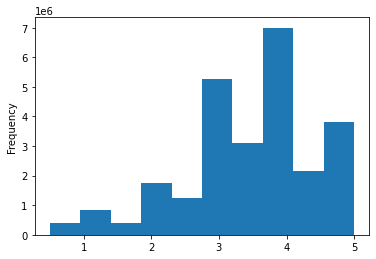

In [99]:
# Visualize the rating values 
ratings["rating"].plot(kind="hist")
ratings["rating"].describe()